<h1>Simon, Searchlight, No Game: Between Participants Pilot</h1>


In [209]:
import os 
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

from util.survey_structure import FSS_SURVEY_STATEMENTS
from util.simon_exposures_counter import simon_exposures_counter

In [210]:
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(font_scale=2)

In [211]:

SEARCHLIGHT_DATA_PATH = "./data/searchlight.db"
NO_GAME_DATA_PATH = "./data/no-game.db"
SIMON_DATA_PATH = "./data/simon.db"

In [212]:
FOLDER_NAME = "game-mechanics-pilot-results"

In [213]:

# Note: this will all be reassigned to actual datasets below 
TRIAL_TABLE_NAME = "table_trialLog"
DEMOGRAPHICS = "questionnaire_demographics"
PARTICIPANT = "participant"
PROGRESS = "progress"

In [214]:
FSS_SURVEY_ONE_NO_GAME = "questionnaire_questionnaire_fss_no_game_1"
FSS_SURVEY_TWO_NO_GAME = "questionnaire_questionnaire_fss_no_game_2"
FSS_SURVEY_THREE_NO_GAME = "questionnaire_questionnaire_fss_no_game_3"
FSS_SURVEY_ONE_SIMON = "questionnaire_modified_fss_1"
FSS_SURVEY_TWO_SIMON = "questionnaire_modified_fss_2"
FSS_SURVEY_THREE_SIMON = "questionnaire_modified_fss_3"
FSS_SURVEY_ONE = "questionnaire_questionnaire_fss_1"
FSS_SURVEY_TWO= "questionnaire_questionnaire_fss_2"
FSS_SURVEY_THREE = "questionnaire_questionnaire_fss_3"

<h2>Read in the data: No Game</h2>

In [215]:
no_game_connection = sqlite3.connect(NO_GAME_DATA_PATH)
cursor = no_game_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no_game_3',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_questionnaire_fss_no_game_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no_game_2',), ('table_trialLog',), ('table_streamLog',)]


In [216]:
NO_GAME_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", no_game_connection)
NO_GAME_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", no_game_connection)
NO_GAME_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_NO_GAME}", no_game_connection)
NO_GAME_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_NO_GAME}", no_game_connection)
NO_GAME_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_NO_GAME}", no_game_connection)
NO_GAME_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", no_game_connection)
NO_GAME_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", no_game_connection)
no_game_connection.close()

In [217]:
NO_GAME_FSS_ONE['breakpoint'] = 1
NO_GAME_FSS_TWO['breakpoint'] = 2
NO_GAME_FSS_THREE['breakpoint'] = 3

NO_GAME_SURVEY = pd.concat([NO_GAME_FSS_ONE, NO_GAME_FSS_TWO, NO_GAME_FSS_THREE], ignore_index=True)

<h2>Read in the data: Searchlight</h2>

In [218]:
searchlight_connection = sqlite3.connect(SEARCHLIGHT_DATA_PATH)
cursor = searchlight_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no-game_3',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_questionnaire_fss_no-game_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no-game_2',), ('table_trialLog',), ('table_streamLog',)]


In [219]:
SEARCHLIGHT_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", searchlight_connection)
SEARCHLIGHT_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", searchlight_connection)
SEARCHLIGHT_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE}", searchlight_connection)
SEARCHLIGHT_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO}", searchlight_connection)
SEARCHLIGHT_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE}", searchlight_connection)
SEARCHLIGHT_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", searchlight_connection)
SEARCHLIGHT_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", searchlight_connection)
searchlight_connection.close()

In [220]:
SEARCHLIGHT_FSS_ONE['breakpoint'] = 1
SEARCHLIGHT_FSS_TWO['breakpoint'] = 2
SEARCHLIGHT_FSS_THREE['breakpoint'] = 3

SEARCHLIGHT_SURVEY = pd.concat([SEARCHLIGHT_FSS_ONE, SEARCHLIGHT_FSS_TWO, SEARCHLIGHT_FSS_THREE], ignore_index=True)

<h2>Read in the data: Simon</h2>

In [221]:
simon_connection = sqlite3.connect(SIMON_DATA_PATH)
cursor = simon_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_motivation_short_9',), ('questionnaire_modified_fss_no_game_3',), ('questionnaire_end_questionnaire',), ('questionnaire_motivation_short_7',), ('questionnaire_modified_fss_2',), ('questionnaire_modified_fss_no_game_1',), ('questionnaire_motivation_short_5',), ('questionnaire_preferences',), ('questionnaire_motivation_short_11',), ('questionnaire_prolific_start',), ('questionnaire_motivation_short_1',), ('questionnaire_motivation_short_8',), ('questionnaire_modified_fss_1',), ('questionnaire_demographics',), ('questionnaire_motivation_short_4',), ('questionnaire_modified_fss_3',), ('questionnaire_motivation_short_3',), ('questionnaire_motivation_short_12',), ('questionnaire_motivation_short_2',), ('questionnaire_modified_fss_no_game_2',), ('questionnaire_motivation_short_10',), ('questionnaire_motivation_short_6',), ('table_trialLog',), ('

In [222]:
SIMON_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", simon_connection)
SIMON_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", simon_connection)
SIMON_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_SIMON}", simon_connection)
SIMON_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_SIMON}", simon_connection)
SIMON_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_SIMON}", simon_connection)
SIMON_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", simon_connection)
SIMON_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", simon_connection)       
simon_connection.close()

In [223]:
SIMON_FSS_ONE['breakpoint'] = 1
SIMON_FSS_TWO['breakpoint'] = 2
SIMON_FSS_THREE['breakpoint'] = 3   

SIMON_SURVEY = pd.concat([SIMON_FSS_ONE, SIMON_FSS_TWO, SIMON_FSS_THREE], ignore_index=True )

<h2>Demographics</h2>

In [224]:
NO_GAME_TRIAL_DATA['treatment'] = 'no-game'
SIMON_TRIAL_DATA['treatment'] = 'simon'
SEARCHLIGHT_TRIAL_DATA['treatment'] = 'searchlight'

In [225]:
NO_GAME_IDS_TO_REMOVE = [1]
SEARCHLIGHT_IDS_TO_REMOVE = [1, 2, 3, 6, 10]
SIMON_IDS_TO_REMOVE = [1, 4, 5, 7, 9, 12, 14, 16] 

SEARCHLIGHT_TRIAL_DATA = SEARCHLIGHT_TRIAL_DATA[~SEARCHLIGHT_TRIAL_DATA["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_DEMOGRAPHICS = SEARCHLIGHT_DEMOGRAPHICS[~SEARCHLIGHT_DEMOGRAPHICS["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_PARTICIPANT = SEARCHLIGHT_PARTICIPANT[~SEARCHLIGHT_PARTICIPANT["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_SURVEY = SEARCHLIGHT_SURVEY[~SEARCHLIGHT_SURVEY["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]

NO_GAME_TRIAL_DATA = NO_GAME_TRIAL_DATA[~NO_GAME_TRIAL_DATA["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_DEMOGRAPHICS = NO_GAME_DEMOGRAPHICS[~NO_GAME_DEMOGRAPHICS["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_PARTICIPANT = NO_GAME_PARTICIPANT[~NO_GAME_PARTICIPANT["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_SURVEY = NO_GAME_SURVEY[~NO_GAME_SURVEY["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]

SIMON_TRIAL_DATA = SIMON_TRIAL_DATA[~SIMON_TRIAL_DATA["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[~SIMON_DEMOGRAPHICS["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_PARTICIPANT = SIMON_PARTICIPANT[~SIMON_PARTICIPANT["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_SURVEY = SIMON_SURVEY[~SIMON_SURVEY["participantID"].isin(SIMON_IDS_TO_REMOVE)]


<h2>Demographic Data Overview</h2>

In [226]:
# FIXME: move to a utility?
def print_some_demographics(name, df):
    print("*****Getting demographics for the " + name + " condition********")
    print("GENDER:")
    print(df['gender'].value_counts())
    print("AGE:")
    print(df['age'].value_counts().sort_index())
    print("VIDEO GAME USAGE PER WEEK:")
    print(df['videoGameUsage'].value_counts().sort_index())
    print("COMPUTER USAGE PER WEEK:")
    print(df['compUsage'].value_counts().sort_index())
    print("OCCUPATION:")
    print(df['occupation'].value_counts())
    print("VISUAL ABILITY AND MS FAMILIARITY:")
    print(df[["microsoftFamiliarity", "visionAbility", "CVD", "visionAblilityType"]].value_counts())

In [227]:
print_some_demographics("No Game", NO_GAME_DEMOGRAPHICS)
print_some_demographics("Searchlight", SEARCHLIGHT_DEMOGRAPHICS)
print_some_demographics("Simon", SIMON_DEMOGRAPHICS)

*****Getting demographics for the No Game condition********
GENDER:
Woman         5
Man           4
Non-binary    1
Name: gender, dtype: int64
AGE:
27    1
32    1
37    1
43    1
46    1
52    1
55    1
56    1
57    1
71    1
Name: age, dtype: int64
VIDEO GAME USAGE PER WEEK:
0     4
1     2
2     1
4     1
15    1
20    1
Name: videoGameUsage, dtype: int64
COMPUTER USAGE PER WEEK:
20    1
30    2
35    1
40    2
50    1
60    2
80    1
Name: compUsage, dtype: int64
OCCUPATION:
Retired                      2
Grad Student Assistant       1
Public Servant               1
preschool aide               1
Business Analysis Manager    1
Graphic Artist               1
Manager                      1
unemployed teacher           1
Communications officer       1
Name: occupation, dtype: int64
VISUAL ABILITY AND MS FAMILIARITY:
microsoftFamiliarity  visionAbility  CVD  visionAblilityType
Yes                   Yes            No                         9
                      No             No    

In [228]:
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[SIMON_DEMOGRAPHICS["visionAbility"] == "Yes"]
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[SIMON_DEMOGRAPHICS["CVD"] == "No"]

NO_GAME_DEMOGRAPHICS = NO_GAME_DEMOGRAPHICS[NO_GAME_DEMOGRAPHICS["visionAbility"] == "Yes"]
NO_GAME_DEMOGRAPHICS = NO_GAME_DEMOGRAPHICS[NO_GAME_DEMOGRAPHICS["CVD"] == "No"]

SEARCHLIGHT_DEMOGRAPHICS = SEARCHLIGHT_DEMOGRAPHICS[SEARCHLIGHT_DEMOGRAPHICS["visionAbility"] == "Yes"]
SEARCHLIGHT_DEMOGRAPHICS = SEARCHLIGHT_DEMOGRAPHICS[SEARCHLIGHT_DEMOGRAPHICS["CVD"] == "No"]

In [229]:
print_some_demographics("No Game", NO_GAME_DEMOGRAPHICS)
print_some_demographics("Searchlight", SEARCHLIGHT_DEMOGRAPHICS)
print_some_demographics("Simon", SIMON_DEMOGRAPHICS)

*****Getting demographics for the No Game condition********
GENDER:
Woman         4
Man           4
Non-binary    1
Name: gender, dtype: int64
AGE:
27    1
32    1
43    1
46    1
52    1
55    1
56    1
57    1
71    1
Name: age, dtype: int64
VIDEO GAME USAGE PER WEEK:
0     3
1     2
2     1
4     1
15    1
20    1
Name: videoGameUsage, dtype: int64
COMPUTER USAGE PER WEEK:
20    1
30    2
35    1
40    2
50    1
60    1
80    1
Name: compUsage, dtype: int64
OCCUPATION:
Retired                      2
Grad Student Assistant       1
Public Servant               1
preschool aide               1
Business Analysis Manager    1
Graphic Artist               1
Manager                      1
unemployed teacher           1
Name: occupation, dtype: int64
VISUAL ABILITY AND MS FAMILIARITY:
microsoftFamiliarity  visionAbility  CVD  visionAblilityType
Yes                   Yes            No                         9
dtype: int64
*****Getting demographics for the Searchlight condition********
GENDE

<h2>Flow State & Motivational Survey</h2>

In [230]:
# Note Side Effects: This function will alter the original dataframe (shallow copy)
def format_likert_data_for_histogram(df: pd.DataFrame, likert_columns: list) -> pd.DataFrame:
    for column_name in likert_columns:
        df[column_name] = df[column_name].replace('1 (Strongly Disagree)', '1')
        df[column_name] = df[column_name].replace('7 (Strongly Agree)', '7')
        df[column_name] = df[column_name].replace('4 (Neutral)', '4')
        df[column_name] = df[column_name].astype('int64')
    return df

In [231]:
SEARCHLIGHT_SURVEY['condition'] = 'Searchlight'
NO_GAME_SURVEY['condition'] = 'No Game'
SIMON_SURVEY['condition'] = 'Simon'
SURVEY = pd.concat([SEARCHLIGHT_SURVEY, NO_GAME_SURVEY, SIMON_SURVEY], ignore_index=True)
SURVEY.fillna(0, inplace=True)
SURVEY = format_likert_data_for_histogram(SURVEY, FSS_SURVEY_STATEMENTS)


if not os.path.exists(f"./plots/{FOLDER_NAME}/survey_overall/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/survey_overall/")



for block in SURVEY['breakpoint'].unique():
    for likert_data in FSS_SURVEY_STATEMENTS:
        plt.figure()
        sns.histplot(data=SURVEY[SURVEY['breakpoint']==block], multiple='dodge', hue='condition', x=likert_data, binrange=(1, 7), discrete=True).set(title=FSS_SURVEY_STATEMENTS[likert_data], xlabel="Likert Scale Response", ylabel="Count")
        plt.savefig(f"./plots/{FOLDER_NAME}/survey_overall/{likert_data}_block_{block}.png")
        plt.close()

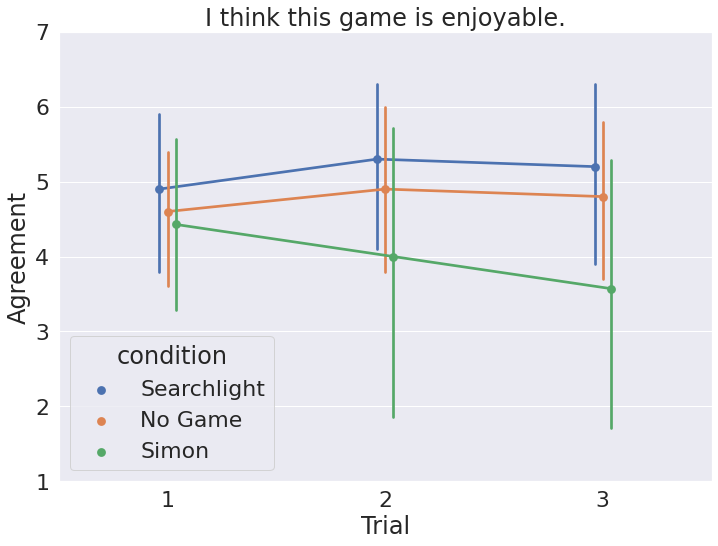

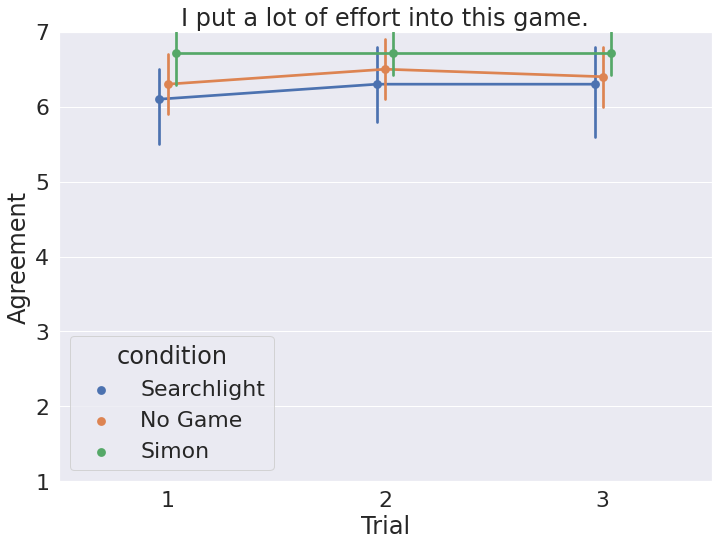

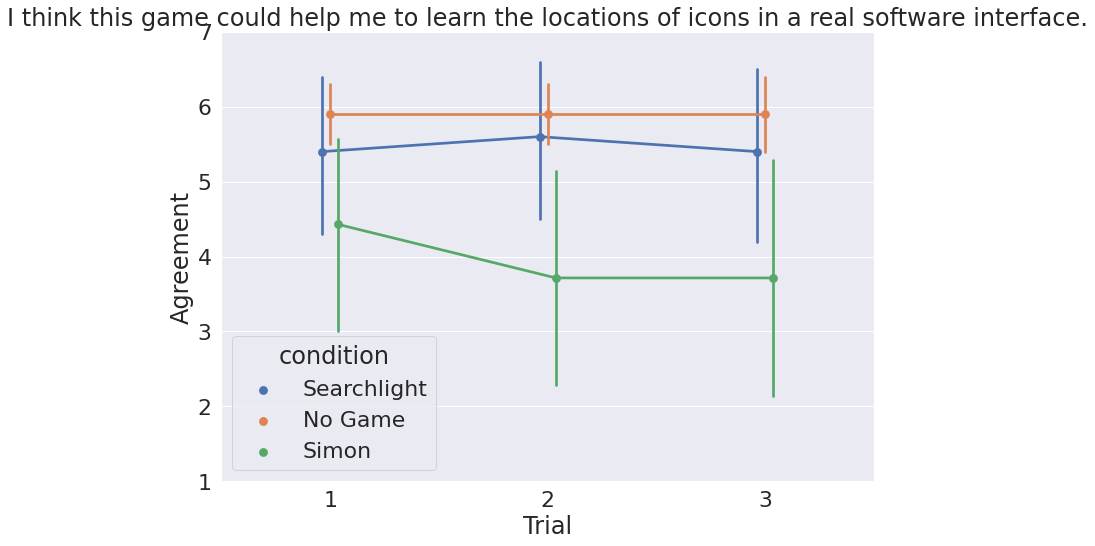

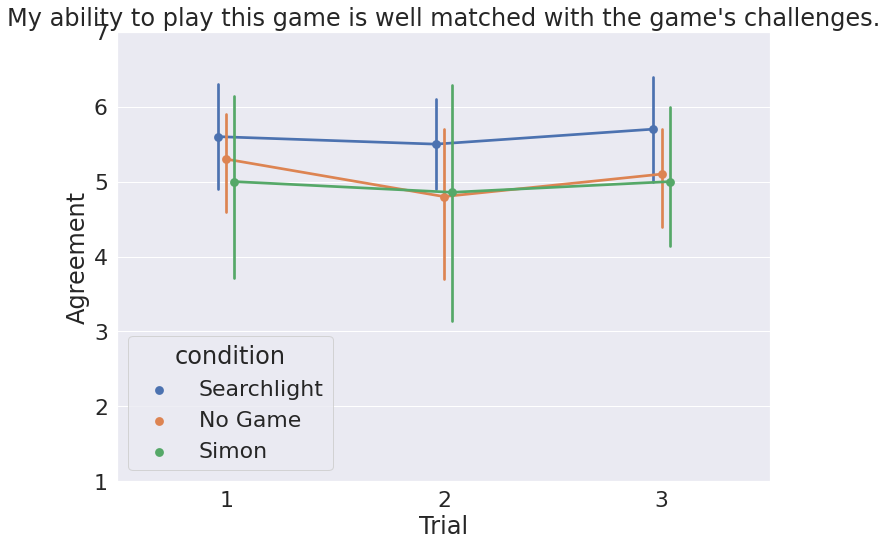

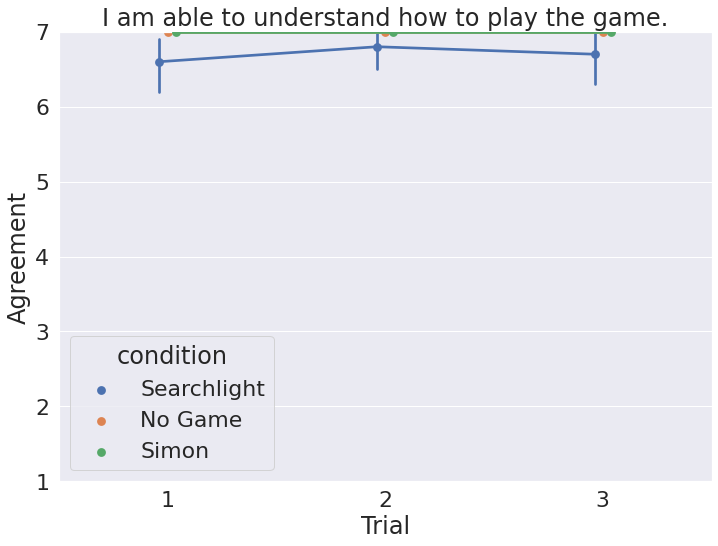

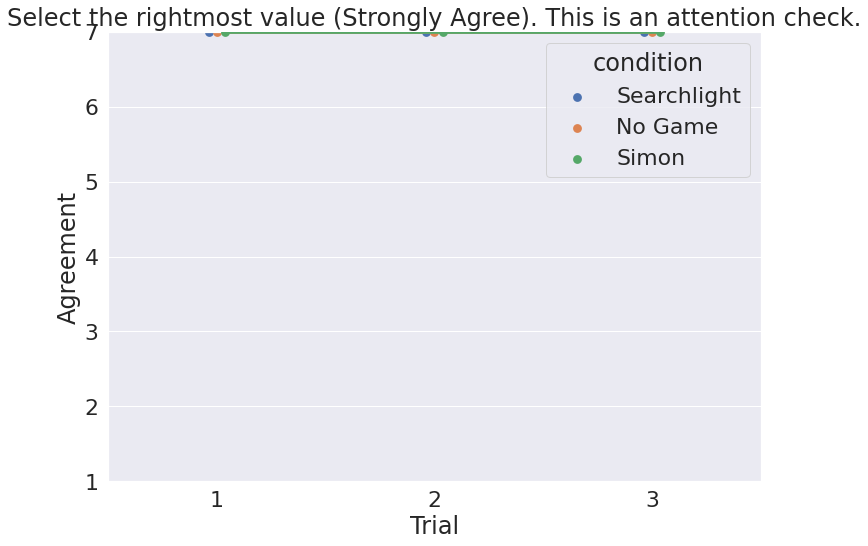

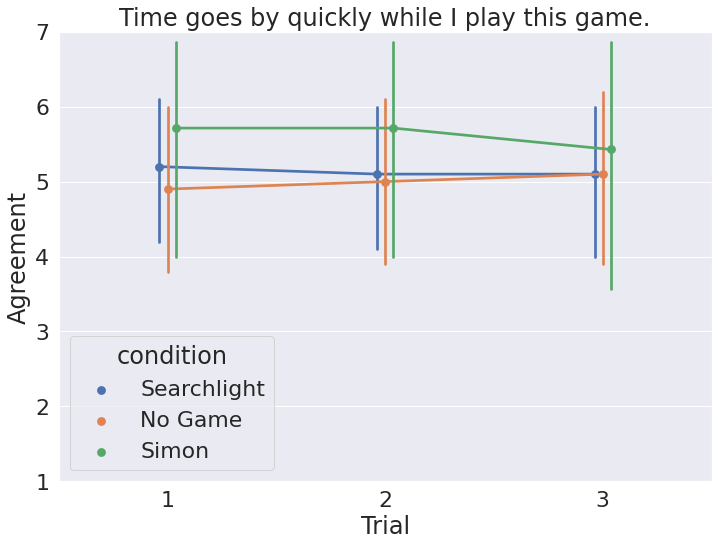

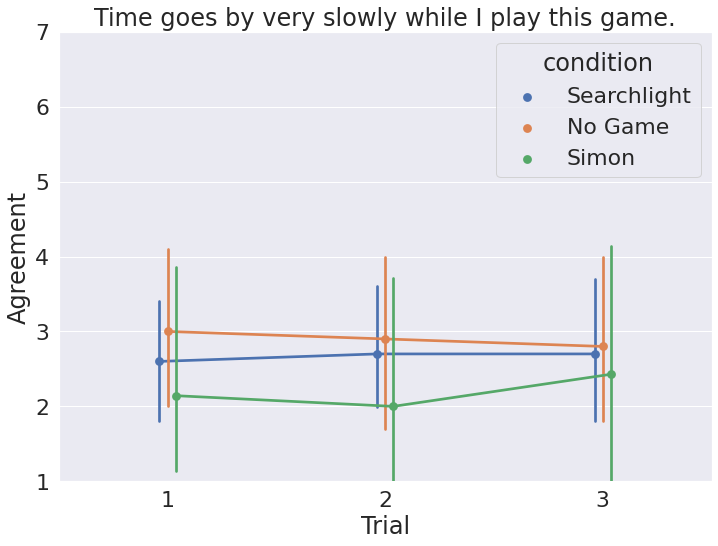

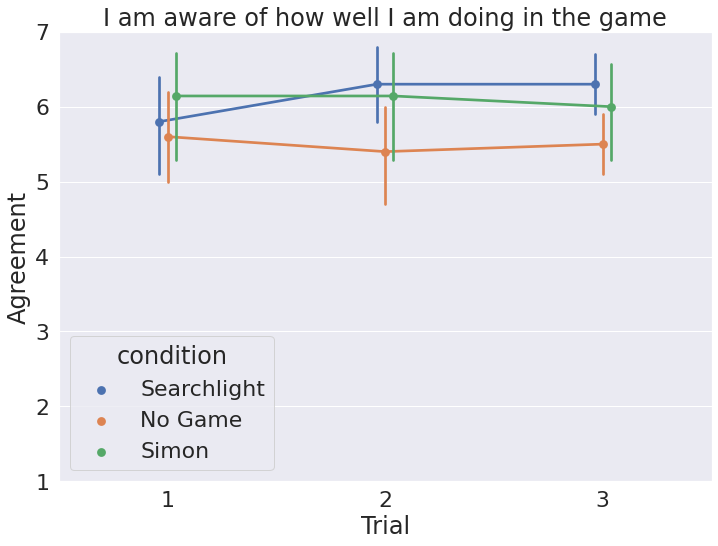

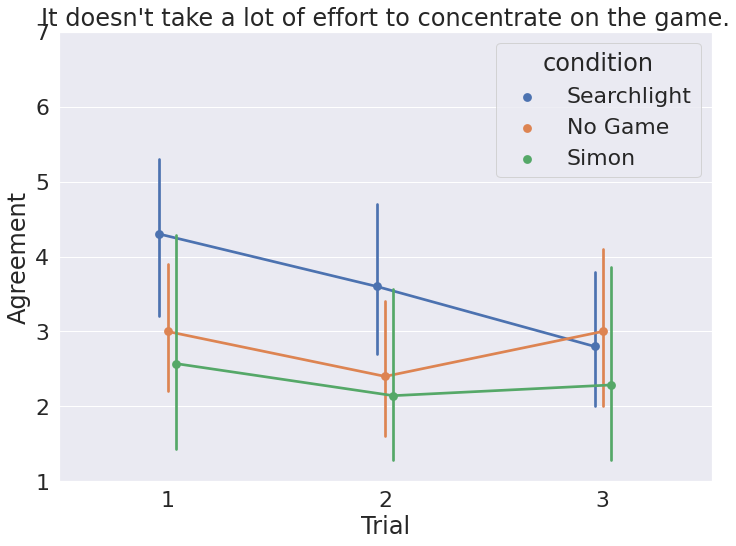

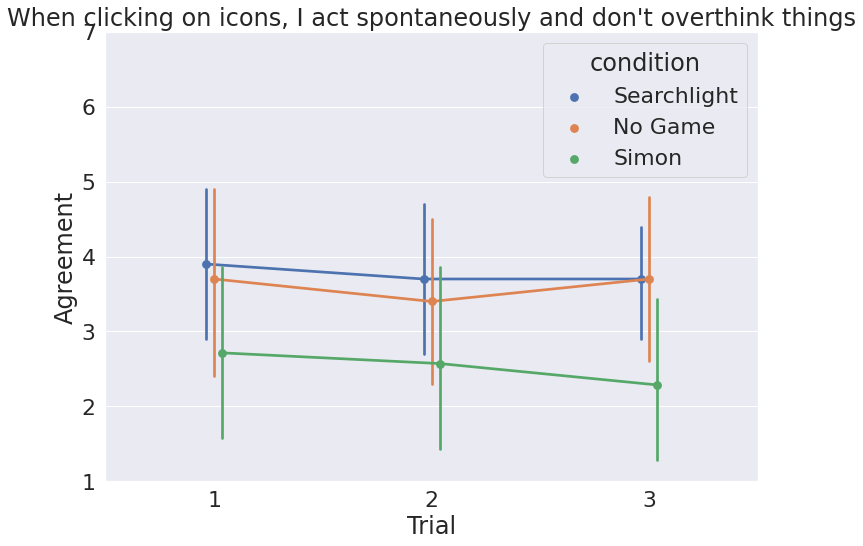

In [232]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/")

for likert_data in FSS_SURVEY_STATEMENTS:
    plt.figure()
    plt.ylim(1, 7)
    sns.pointplot(data=SURVEY, x='breakpoint', y=likert_data, hue='condition', dodge=True, errorbar=('ci', 95)).set(title=FSS_SURVEY_STATEMENTS[likert_data], xlabel="Trial", ylabel="Agreement")
    plt.savefig(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/{likert_data}.png")

<h2>Trial Data</h2>

In [233]:

if not os.path.exists(f"./plots/{FOLDER_NAME}/trial_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/trial_data/")

In [234]:
simon_trial_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'training']
simon_trial_data = simon_trial_data_filtered.sort_values(['participantID', 'timeSubmitted'])
# simon_trial_data['trial_order'] = simon_trial_data.groupby('participantID').cumcount() + 1
simon_trial_data['trial_order'] = simon_trial_data_filtered['gameDistributionIndex'] + 1



In [235]:
simon_trial_data.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'gameDistributionIndex',
       'cursorWidth', 'ct', 'underGuide', 'errors', 'movement', 'confidence',
       'errorObjects', 'cumulativeManhattanDistance',
       'cumulativeEuclideanDistance', 'sequence', 'manhattanDistanceLog',
       'euclideanDistanceLog', 'ctForTargetInOrder', 'targetErrorArray',
       'errorInTrial', 'treatment', 'trial_order'],
      dtype='object')

In [236]:
searchlight_trial_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'training']
searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['manhattan']==0]
searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['errors']==0]
searchlight_successful_trials = searchlight_successful_trials.sort_values(['participantID', 'timeSubmitted'])
searchlight_successful_trials['trial_order'] = searchlight_successful_trials.groupby('participantID').cumcount() + 1
searchlight_successful_trials['block_order'] = searchlight_successful_trials['trial_order'].apply(lambda x: (x - 1) // 6 + 1)

no_game_trial_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'training']
no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['manhattan']==0]
no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['errors']==0]
no_game_successful_trials = no_game_successful_trials.sort_values(['participantID', 'timeSubmitted'])
no_game_successful_trials['trial_order'] = no_game_successful_trials.groupby('participantID').cumcount() + 1
no_game_successful_trials['block_order'] = no_game_successful_trials['trial_order'].apply(lambda x: (x - 1) // 6 + 1)

In [237]:
simon_trial_data['targetErrorArray'].to_csv(f"./plots/{FOLDER_NAME}/trial_data/simon_target_error_arrays.csv")

In [238]:
import json
trials_time_per_target = []

def get_target_id_from_simon_sequence(row):
    if row['treatment'] == 'simon':
        if int(row['errorInTrial']) == 0:
            sequence_list = row['sequence'].split(',')
            ct_list = row['ctForTargetInOrder'].split(',')
            # FIXME: move to function, also this was a terrible way to save the errors! 
            error_array = []
            if row['targetErrorArray'] is not None and row['targetErrorArray'] != '-1':
                try:
                    error_array_str = row['targetErrorArray'].split('},{')
                    for i, item in enumerate(error_array_str):
                        if i == 0:
                            item = item + '}'
                        elif i == len(error_array_str) - 1:
                            item = '{' + item
                        else:
                            item = '{' + item + '}'
                        error_array.append(json.loads(item))
                except:
                    pass
            for i in range(0, len(sequence_list)):
                # if error_array[i]["correct"] ==1 and error_array[i]["num_errors"] ==0:
                # if error_array[i]["num_errors"] ==0:
                    trials_time_per_target.append({
                        'condition': 'simon',
                        'targetID': int(sequence_list[i]),
                        'ct': float(ct_list[i]),
                        'trial': int(row['trial']),  
                        'block': int(row['gameDistributionIndex'] + 1),
                        'trial_order': int(row['trial_order']),
                        'participantID': int(row['participantID']), 
                        'timeSubmitted': row['timeSubmitted'],
                        'locationInSequence': (i + 1),
                        'sequence' : row['sequence'],
                        'exposure_count': simon_exposures_counter(len(sequence_list), sequence_list[i], int(row['gameDistributionIndex']))
                    })
    else:
            trials_time_per_target.append({
                'condition': row['treatment'],
                'targetID': row['targetID'],
                'ct': row['ct'],
                'block': int(row['block_order']), 
                'timeSubmitted': row['timeSubmitted']
            })
    return row

In [239]:
trial_data = pd.concat([searchlight_successful_trials, no_game_successful_trials], ignore_index=True)
trial_data = trial_data.append(simon_trial_data, ignore_index=True)

trial_data.apply(lambda row: get_target_id_from_simon_sequence(row), axis=1)

targets_time_per_click = pd.DataFrame(trials_time_per_target)    

targets_time_per_click = targets_time_per_click[~((targets_time_per_click['condition'] == 'simon') & (targets_time_per_click['exposure_count'] > 15))]


/tmp/ipykernel_5327/3787706973.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial_data = trial_data.append(simon_trial_data, ignore_index=True)


In [240]:
check_9 = targets_time_per_click[(targets_time_per_click['condition'] == 'simon') & (targets_time_per_click['targetID'] == 105) & (targets_time_per_click['exposure_count'] < 10) & (targets_time_per_click['exposure_count'] > 7)]

check_9

,condition,targetID,ct,block,timeSubmitted,trial,trial_order,participantID,locationInSequence,sequence,exposure_count
1791,simon,105,3.1681,4,2026-01-21 17:54:57.627699,5.0,4.0,2.0,1.0,"105,81,71",9.0
1870,simon,105,5.9779,4,2026-01-21 18:00:02.304298,5.0,4.0,6.0,1.0,"105,81,71",9.0
1919,simon,105,2.7113,4,2026-01-21 17:57:14.135308,5.0,4.0,8.0,1.0,"105,81,71",9.0
1976,simon,105,1.8559,3,2026-01-21 18:09:57.356640,4.0,3.0,10.0,6.0,"16,14,138,71,81,105",8.0
1977,simon,105,5.6064,4,2026-01-21 18:10:12.684438,5.0,4.0,10.0,1.0,"105,81,71",9.0
2042,simon,105,5.1371,4,2026-01-21 18:09:23.128140,5.0,4.0,11.0,1.0,"105,81,71",9.0
2095,simon,105,3.5951,4,2026-01-21 18:08:19.358860,5.0,4.0,13.0,1.0,"105,81,71",9.0
2174,simon,105,4.8957,4,2026-01-21 18:22:04.187412,5.0,4.0,15.0,1.0,"105,81,71",9.0


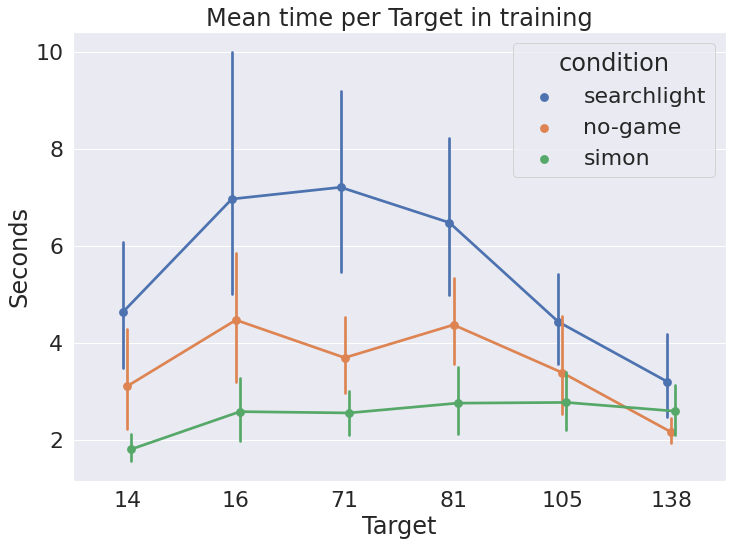

In [241]:



plt.figure()
sns.pointplot(data=targets_time_per_click, x='targetID', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title="Mean time per Target in training", xlabel="Target", ylabel="Seconds")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target.png")

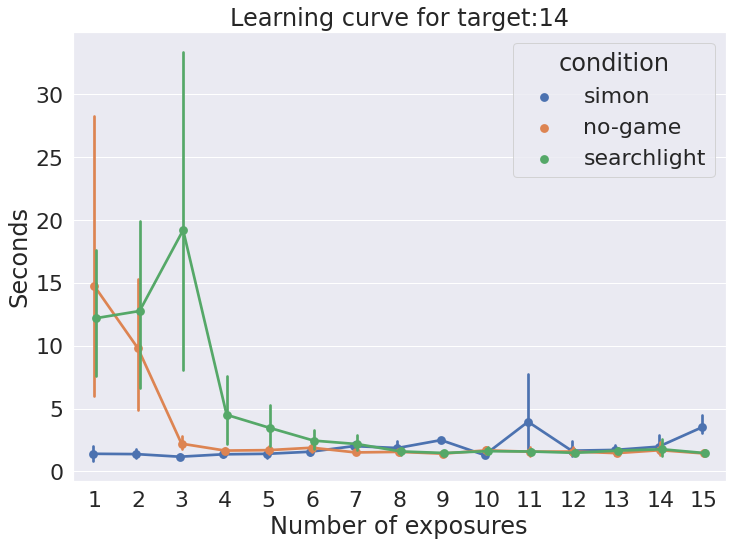

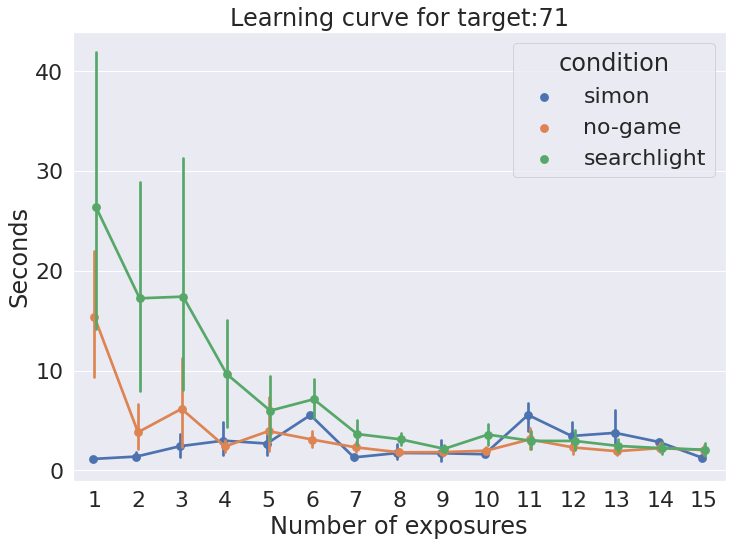

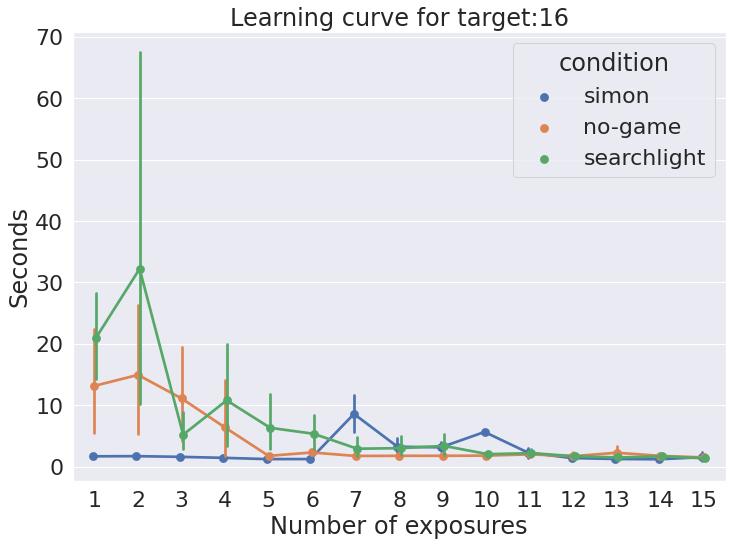

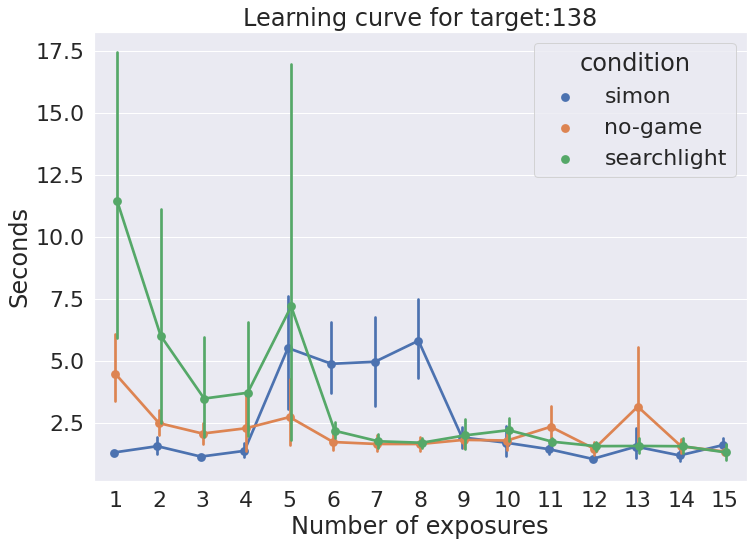

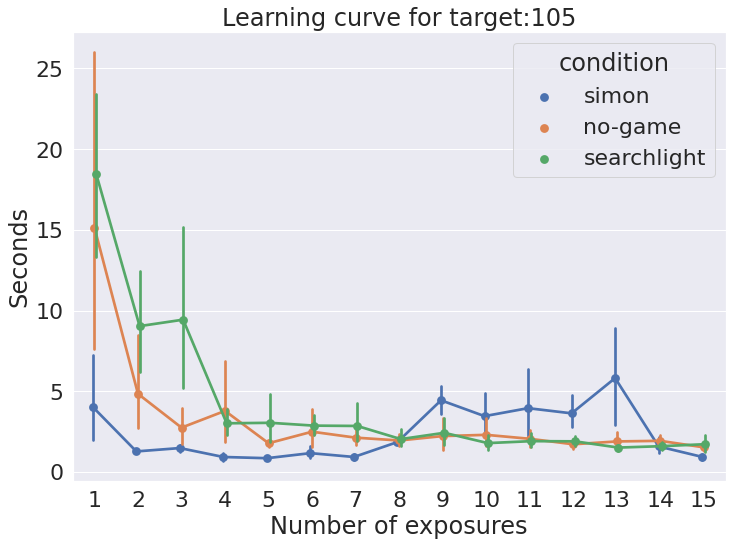

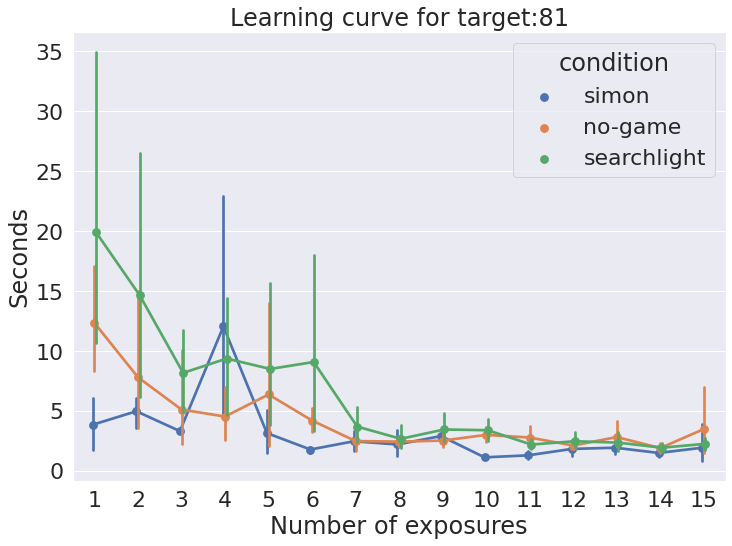

In [242]:
targets = targets_time_per_click['targetID'].unique()

targets_time_per_click.to_csv(f"./plots/{FOLDER_NAME}/trial_data/targets_time_per_click.csv")

for target in targets:
    target_data = targets_time_per_click[targets_time_per_click['targetID'] == target]
    target_data_ordered = target_data.sort_values(['participantID', 'timeSubmitted'])
    target_data_ordered['target_order'] = target_data_ordered.apply(lambda row: int(row['exposure_count']) if row['condition']=='simon' else int(row['block']), axis=1)
    plt.figure()
    sns.pointplot(data=target_data_ordered, x='target_order', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title=f"Learning curve for target:{target}", xlabel="Number of exposures", ylabel="Seconds")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target_{str(target)}.png")

<h2>Time to click based on placement in the sequence</h2>

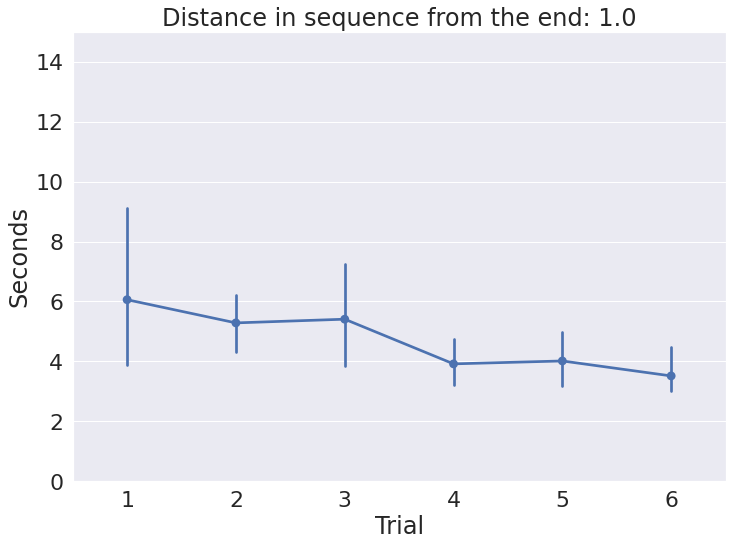

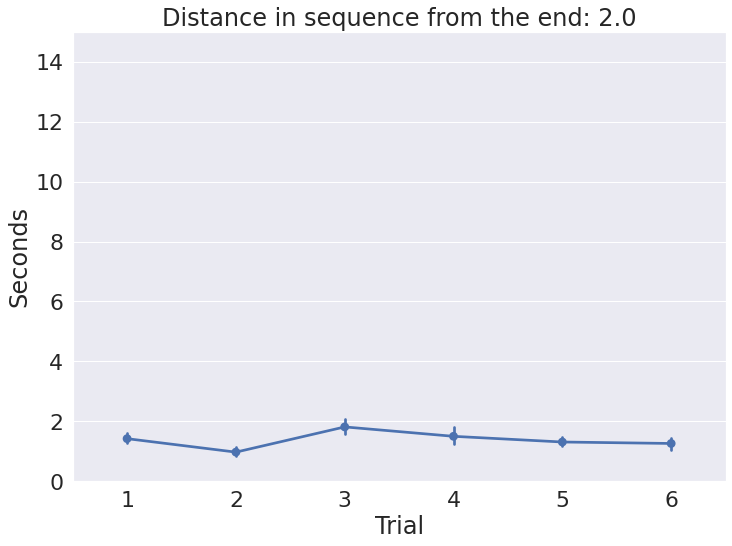

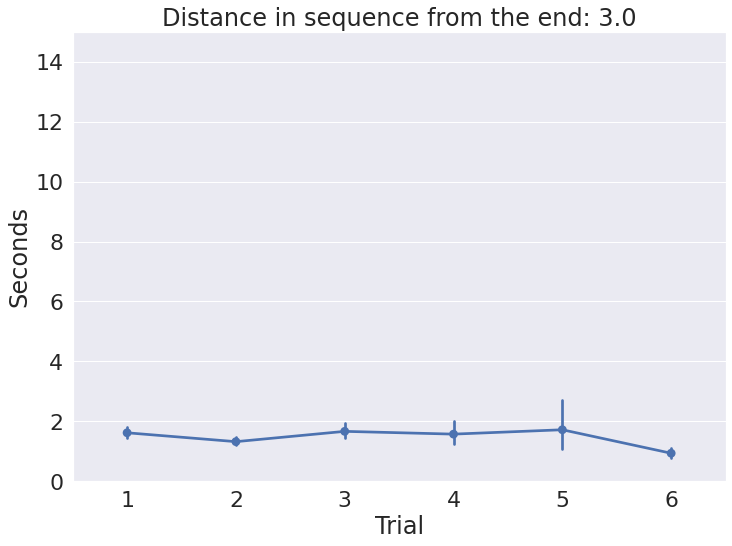

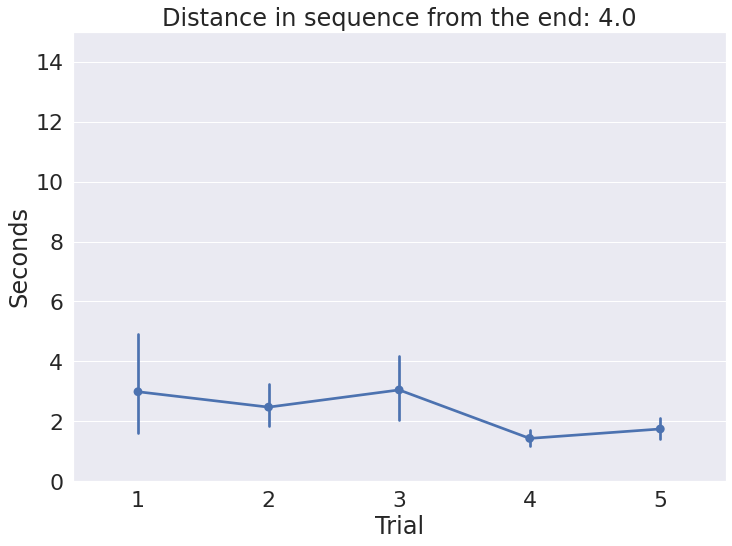

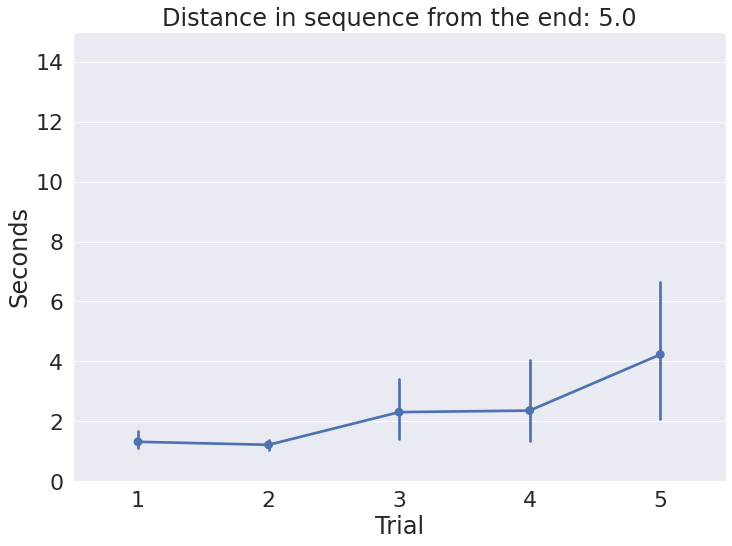

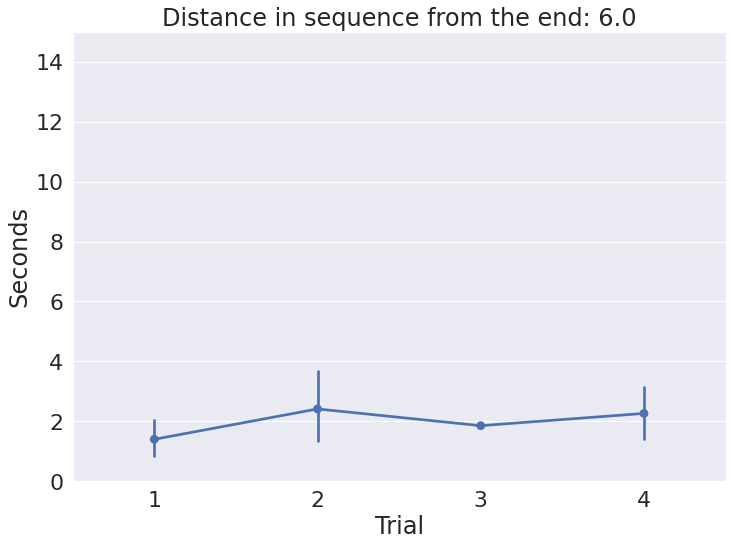

In [243]:
targets_time_per_click.dropna(inplace=True)
sequence_locations = targets_time_per_click['locationInSequence'].unique()
sequence_locations = sorted(sequence_locations)


for n in sequence_locations:
    location_data = targets_time_per_click[(targets_time_per_click['locationInSequence'] == n) & (targets_time_per_click['condition']=='simon')]
    plt.figure()
    sns.pointplot(data=location_data, x='block', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title=f"Distance in sequence from the end: {n}", xlabel="Trial", ylabel="Seconds")
    plt.ylim(0, 15)
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/distance_from_end_of_sequence_{n}.png")

<h2>Memory Test Analysis</h2>

In [244]:
searchlight_test_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'testing']
searchlight_test_data_ordered = searchlight_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
searchlight_test_data_ordered['test_order'] = searchlight_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_test_data_ordered['breakpoint'] = searchlight_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1) # seven because of attention checks.
searchlight_test_data_ordered['condition'] = 'Searchlight'


no_game_test_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'testing']
no_game_test_data_ordered = no_game_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
no_game_test_data_ordered['test_order'] = no_game_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_test_data_ordered['breakpoint'] = no_game_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
no_game_test_data_ordered['condition'] = 'No Game'

simon_test_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'testing']
simon_test_data_ordered = simon_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
simon_test_data_ordered['test_order'] = simon_test_data_ordered.groupby('participantID').cumcount() + 1
simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['breakpoint'].apply(lambda x: x-3 if x>3 else x)
simon_test_data_ordered['condition'] = 'Simon'


test_data = pd.concat([searchlight_test_data_ordered, no_game_test_data_ordered, simon_test_data_ordered], ignore_index=True)

In [245]:
ATTENTION_CHECK_IDS = [4, 8]
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]

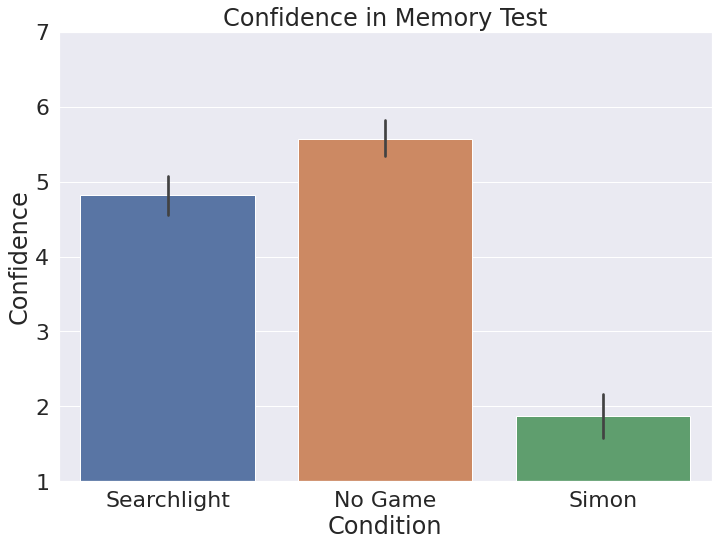

In [246]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/test_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/test_data/")

confidence = test_data[test_data['confidence']>0]

confidence = confidence[~confidence["test_order"].isin(ATTENTION_CHECK_IDS)]
# graph the mean engagement per trial order 
plt.figure()
sns.barplot(data=test_data, x='condition', y=f'confidence', ci=95).set(title="Confidence in Memory Test", xlabel="Condition", ylabel="Confidence")
#sns.pointplot(data=confidence , x='test_order', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Reported confidence in selection", xlabel="Trial", ylabel="Reported Confidence")
plt.ylim(1, 7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence.png")

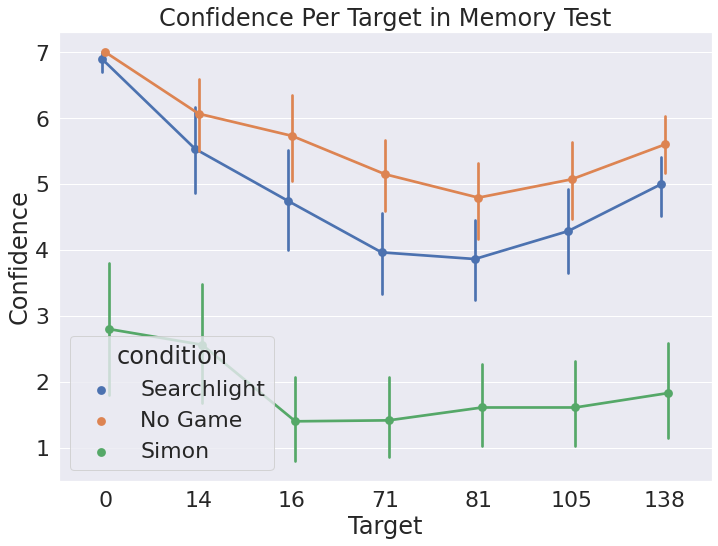

In [247]:
# confidence per target in memory test 
plt.figure()
sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_target.png")

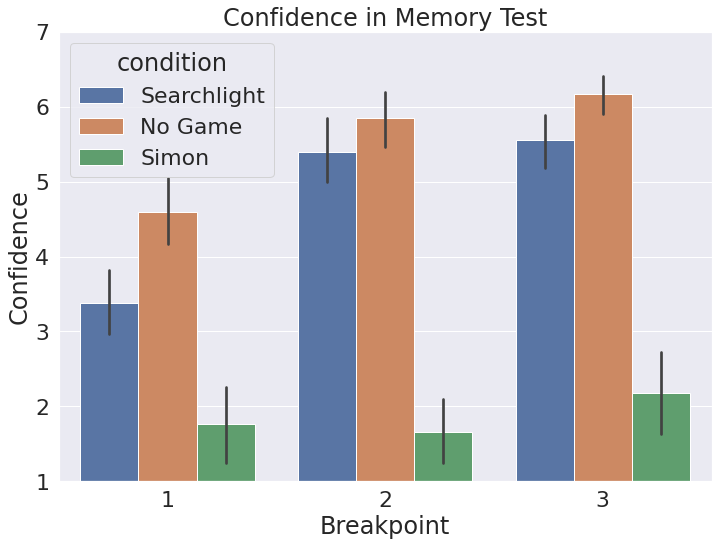

In [248]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'confidence', hue="condition", ci=95).set(title="Confidence in Memory Test", xlabel="Breakpoint", ylabel="Confidence")
plt.ylim(1, 7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_breakpoint.png")

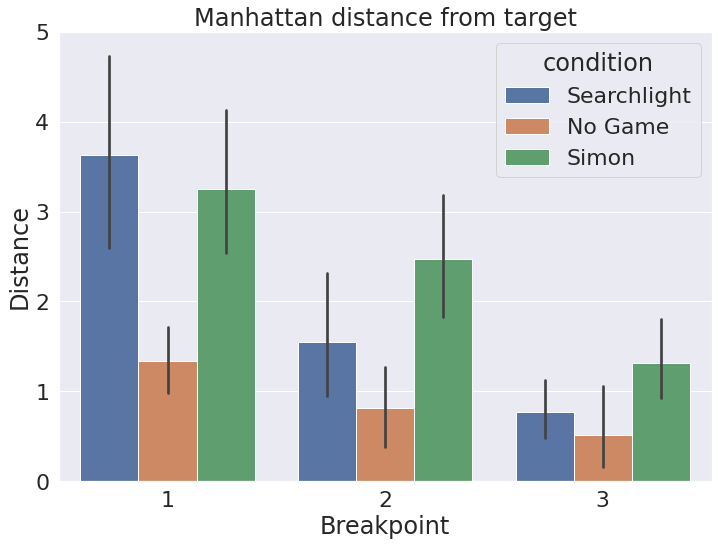

In [249]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'manhattan', hue="condition", ci=95).set(title="Manhattan distance from target", xlabel="Breakpoint", ylabel="Distance")
plt.ylim(0, 5)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_per_breakpoint.png")

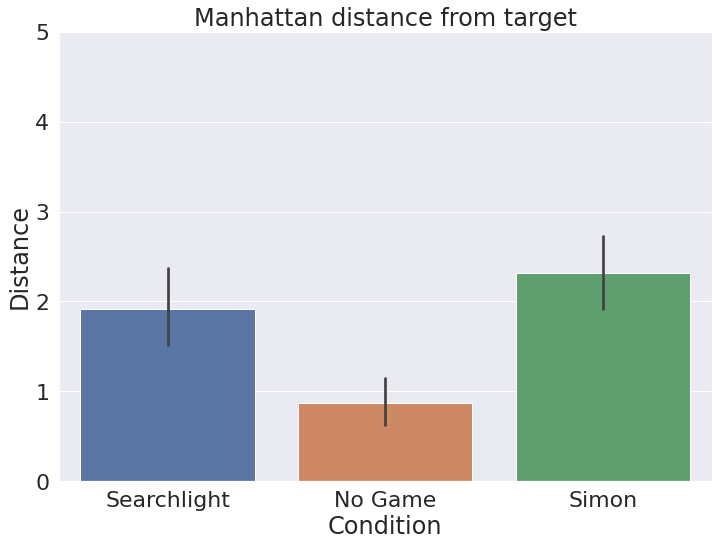

In [250]:
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]

plt.figure()
sns.barplot(data=test_data, x='condition', y=f'manhattan', ci=95).set(title="Manhattan distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 5)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_test_performance.png")

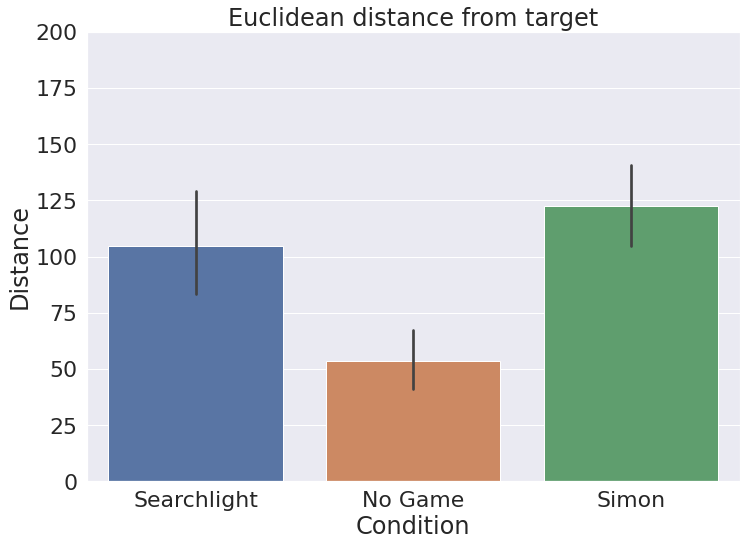

In [251]:

plt.figure()
sns.barplot(data=test_data, x='condition', y=f'euclidean', ci=95).set(title="Euclidean distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 200)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_test_performance.png")

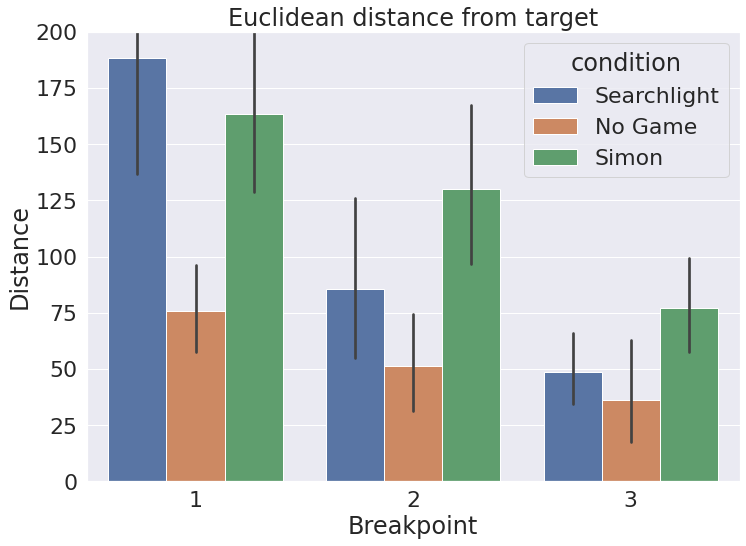

In [252]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'euclidean', hue="condition", ci=95).set(title="Euclidean distance from target", xlabel="Breakpoint", ylabel="Distance")
plt.ylim(0, 200)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_per_breakpoint.png")

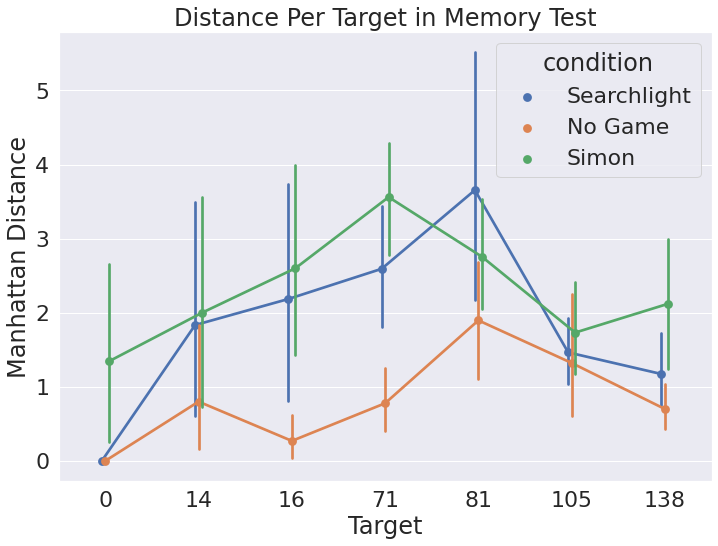

In [253]:
plt.figure()
sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, errorbar=('ci', 95)).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/distance_per_target.png")

<h2>Sequence Test Analysis</h2>

In [254]:
simon_sequence_test_data = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase']=="sequence_testing"]
simon_sequence_test_data_ordered = simon_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
simon_sequence_test_data_ordered['sequence_test_order_by_participant'] = simon_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
simon_sequence_test_data_ordered['sequence_test_order'] = simon_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
simon_sequence_test_data_ordered['condition'] = 'simon'

no_game_sequence_test_data = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase']=="sequence_testing"]
no_game_sequence_test_data_ordered = no_game_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
no_game_sequence_test_data_ordered['sequence_test_order_by_participant'] = no_game_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_sequence_test_data_ordered['sequence_test_order'] = no_game_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
no_game_sequence_test_data_ordered['condition'] = 'no-game'

searchlight_sequence_test_data = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase']=="sequence_testing"]
searchlight_sequence_test_data_ordered = searchlight_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'] = searchlight_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_sequence_test_data_ordered['sequence_test_order'] = searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
searchlight_sequence_test_data_ordered['condition'] = 'searchlight' 

In [255]:
simon_sequence_test_data.head()

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,errorObjects,cumulativeManhattanDistance,cumulativeEuclideanDistance,sequence,manhattanDistanceLog,euclideanDistanceLog,ctForTargetInOrder,targetErrorArray,errorInTrial,treatment
44,45,2,2026-01-21 17:52:37.547841,2,NO_GUIDE,5f03689af7a20a55f0edc079,1,sequence_testing,1,1,...,,34,1864.880200,"81,138,16,105,71,14","1,0,15,1,2,15","54.78138369920934,7.615773105863909,836.809416...",,,0,simon
46,47,2,2026-01-21 17:52:56.193767,2,NO_GUIDE,5f03689af7a20a55f0edc079,1,sequence_testing,1,2,...,,7,357.675502,"138,105,14,81,16,71","2,3,0,1,0,1","80.61017305526643,139.53135848260058,13.928388...",,,0,simon
69,70,8,2026-01-21 17:55:20.852639,8,NO_GUIDE,663bc254f4b7b1bf2cdd0a70,1,sequence_testing,1,1,...,,13,612.801019,"81,138,16,105,71,14","1,2,7,2,1,0","72.06247289678588,99.29753269845128,309.808005...",,,0,simon
72,73,8,2026-01-21 17:55:35.742421,8,NO_GUIDE,663bc254f4b7b1bf2cdd0a70,1,sequence_testing,1,2,...,,6,328.155445,"138,105,14,81,16,71","1,1,0,1,1,2","75.10659092250161,58.13776741499453,17.6918060...",,,0,simon
107,108,6,2026-01-21 17:57:41.048593,6,NO_GUIDE,6730f965beb7513190d2be93,1,sequence_testing,1,1,...,,25,1180.022451,"81,138,16,105,71,14","6,1,7,2,9,0","307.93830550939913,54.08326913195984,304.82125...",,,0,simon


In [256]:
sequence_data_remapped = []

def save_to_sequence_data_remapped(row):
    sequence_list = row['sequence'].split(',')
    manhattan_distance_list = row['manhattanDistanceLog'].split(',')
    euclidean_distance_list = row['euclideanDistanceLog'].split(',')
    for i in range(0, len(sequence_list)):
        sequence_data_remapped.append({
            'condition': row['treatment'],
            'sequence': row['sequence'], # FIXME: these should all be in the same order between pilots, and we could check   
            'targetID': str(sequence_list[i]),
            'participantID': int(row['participantID']),
            'timeSubmitted': row['timeSubmitted'],
            'locationInSequence': (i + 1),
            'manhattanDistance': int(manhattan_distance_list[i]),
            'euclideanDistance': float(euclidean_distance_list[i]),
        })
    return row

In [257]:
sequence_test_data = pd.concat([searchlight_sequence_test_data_ordered, no_game_sequence_test_data_ordered, simon_sequence_test_data_ordered], ignore_index=True)
sequence_test_data.apply(lambda row: save_to_sequence_data_remapped(row), axis=1)

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,manhattanDistanceLog,euclideanDistanceLog,treatment,sequence_test_order_by_participant,sequence_test_order,gameDistributionIndex,cursorWidth,ctForTargetInOrder,targetErrorArray,errorInTrial
0,59,4,2026-01-21 16:30:22.140372,4,searchlight,62a0b34cbcc5987a8fa73c39,1,sequence_testing,1,1,...,"10,2,2,1,2,2","419.63079010005924,131.24404748406687,125.7815...",searchlight,1,1,NaN,NaN,NaN,NaN,NaN
1,61,4,2026-01-21 16:30:33.308143,4,searchlight,62a0b34cbcc5987a8fa73c39,1,sequence_testing,1,2,...,"2,2,2,3,4,3","113.15917991926241,74.94664769020693,92.698435...",searchlight,2,1,NaN,NaN,NaN,NaN,NaN
2,140,4,2026-01-21 16:34:03.799051,4,searchlight,62a0b34cbcc5987a8fa73c39,1,sequence_testing,6,1,...,"0,0,1,4,3,2","5.8309518948453,14.142135623730951,56.14267539...",searchlight,3,2,NaN,NaN,NaN,NaN,NaN
3,144,4,2026-01-21 16:34:16.484568,4,searchlight,62a0b34cbcc5987a8fa73c39,1,sequence_testing,6,2,...,"3,10,6,2,0,0","117.88553770501284,420.2118513321584,301.17934...",searchlight,4,2,NaN,NaN,NaN,NaN,NaN
4,292,4,2026-01-21 16:37:23.376005,4,searchlight,62a0b34cbcc5987a8fa73c39,1,sequence_testing,11,1,...,"0,0,1,0,2,1","12.529964086141668,15.132745950421555,62.07253...",searchlight,5,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,467,15,2026-01-21 18:18:55.182273,15,simon,565e944394730100114a9119,1,sequence_testing,1,2,...,"8,2,14,5,14,6","412.6330088589617,82.97590011563598,669.809674...",simon,2,1,-1.0,75.0,,,0.0
158,529,15,2026-01-21 18:25:58.471923,15,simon,565e944394730100114a9119,1,sequence_testing,1,1,...,"18,15,7,5,2,3","775.3276726649192,854.9695901024784,376.378798...",simon,3,2,-1.0,75.0,,,0.0
159,530,15,2026-01-21 18:26:19.360246,15,simon,565e944394730100114a9119,1,sequence_testing,1,2,...,"3,11,5,8,0,0","170.10584939971938,533.1134963588897,233.57439...",simon,4,2,-1.0,75.0,,,0.0
160,553,15,2026-01-21 18:33:13.962773,15,simon,565e944394730100114a9119,1,sequence_testing,1,1,...,"10,0,3,1,2,0","443.8423143414787,20.09975124224178,144.474911...",simon,5,3,-1.0,75.0,,,0.0


In [258]:


def getMeanManhattanDistanceFromString(s: str)-> int:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=int(substring)
    return total/len(split_s)


def getMeanEuclideanDistanceFromString(s: str)-> float:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=float(substring)
    return total/len(split_s)

sequence_test_data['mean_manhattan_distance_per_target'] = sequence_test_data['manhattanDistanceLog'].apply(lambda x: getMeanManhattanDistanceFromString(x))
sequence_test_data['mean_euclidean_distance_per_target'] = sequence_test_data['euclideanDistanceLog'].apply(lambda x: getMeanEuclideanDistanceFromString(x))


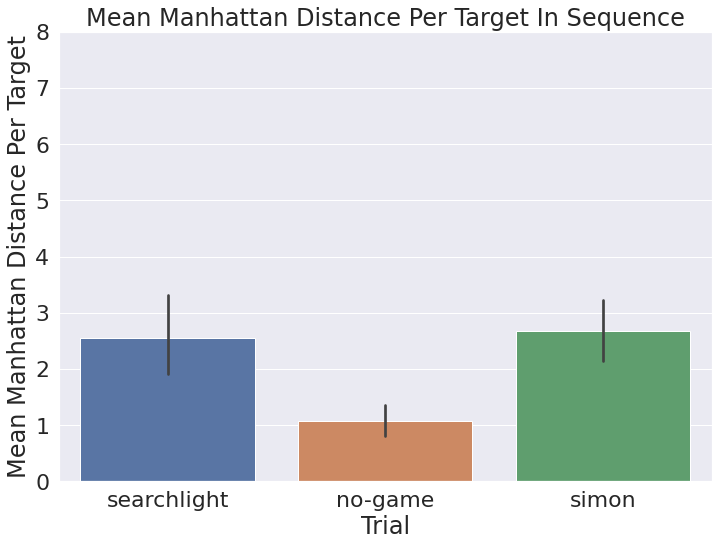

In [259]:
plt.figure()
sns.barplot(data=sequence_test_data, x='condition', y=f'mean_manhattan_distance_per_target', ci=95).set(title="Mean Manhattan Distance Per Target In Sequence", xlabel="Trial", ylabel="Mean Manhattan Distance Per Target")
plt.ylim(0,8)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_mean_manhattan_distance_per_targets.png")

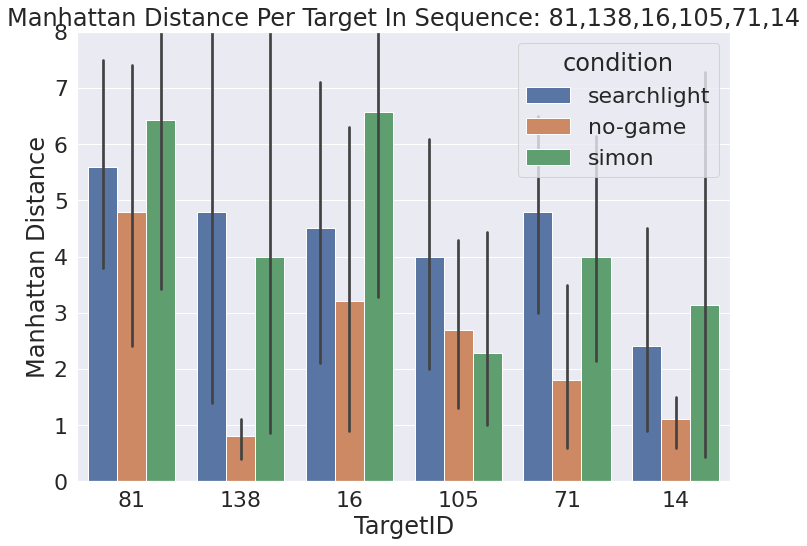

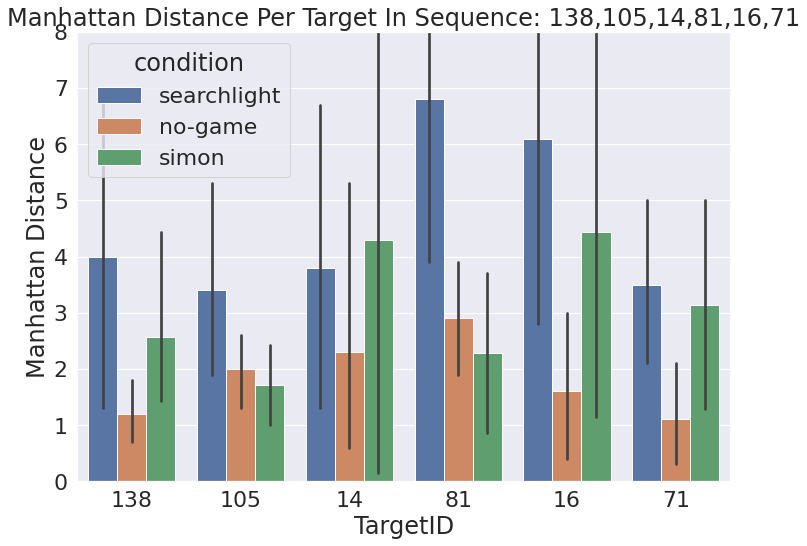

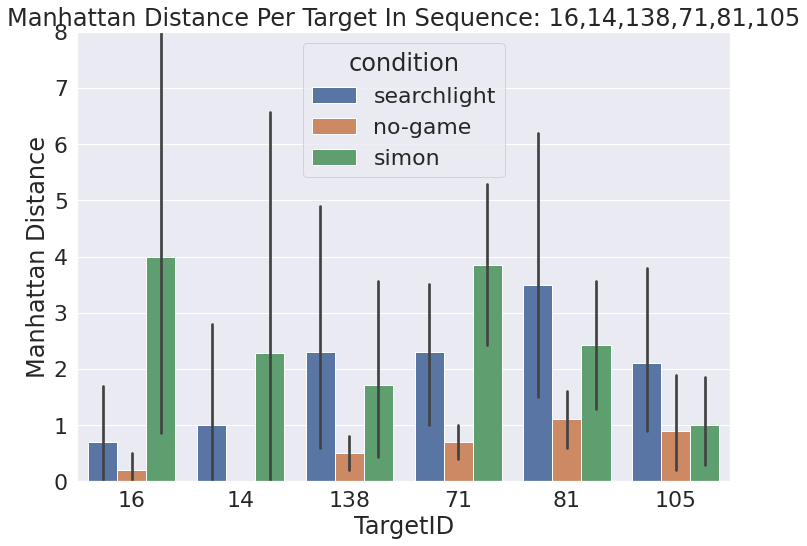

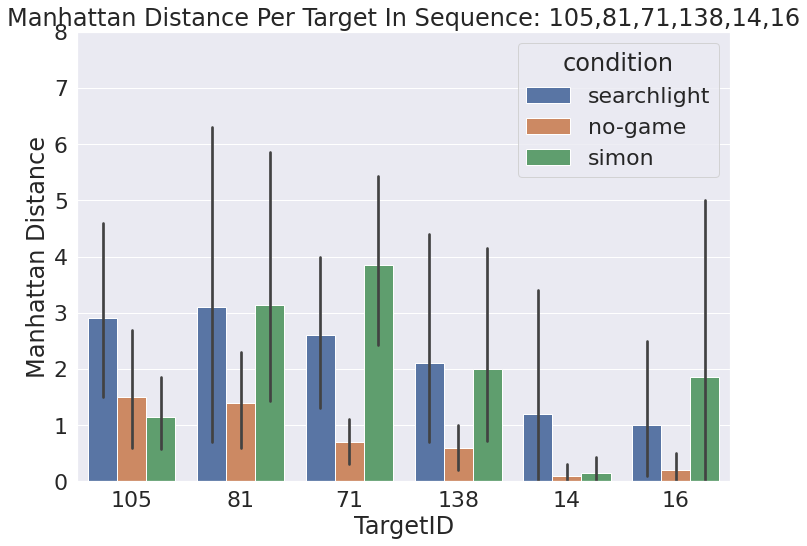

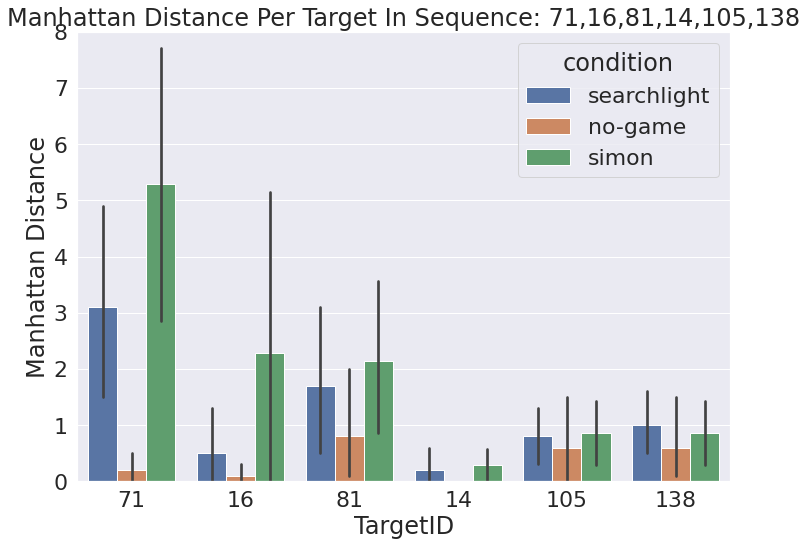

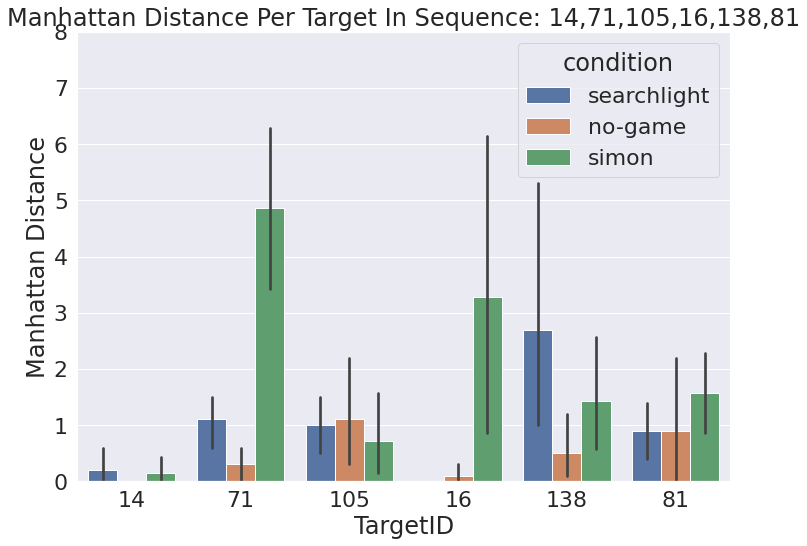

In [260]:
test_sequences = sequence_test_data['sequence'].unique()

sequence_data_remapped = pd.DataFrame(sequence_data_remapped)   

for sequence in test_sequences:
    sequence_data = sequence_data_remapped[sequence_data_remapped['sequence'] == sequence]
    plt.figure()
    sns.barplot(data=sequence_data, x='targetID', y=f'manhattanDistance', hue='condition', ci=95).set(title=f"Manhattan Distance Per Target In Sequence: {sequence}", xlabel="TargetID", ylabel="Manhattan Distance")
    plt.ylim(0,8)
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_manhattan_distance_per_targets_sequence_{sequence}.png")